In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [67]:
cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None, names=cols)
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Получилось что 1 бинарный признак в 57 колонке и остальные вещественные ?...



In [68]:
print('Размер выборки составляет l={} объектов.'.format(len(df)))

Размер выборки составляет l=4601 объектов.


На следующую часть визуализации я потратил слишком много времени поэтому не могу не показать, даже при том что у меня ничего не получилось, я все же проиллюстрирую почему переход от 57 измерений к 2 плохая идея.



In [69]:
from sklearn.decomposition import PCA
x = StandardScaler().fit_transform(df)
x = pd.DataFrame(x)
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,-0.899005,0.361221,-0.661398,0.301241,-0.215632,-0.493937,-0.143706,0.022848,0.710765,-0.530218,-1.247021,0.205146,-0.107292,0.203067,0.411338,0.005014,0.346887,-0.072450,0.223212,0.320808,-0.593255,0.298544,0.268043,-0.192418,0.108499,-0.699740,0.781273,-0.167543,0.620181,0.215762,-0.330494,0.198508,0.274403,-0.260471,-0.527390,-0.066649,0.486422,0.237167,0.098757,0.222141,0.120785,0.139904,-0.789201,-0.054042,-0.222640,-0.054530,-0.268901,-0.387310,0.164889,0.076083,0.389119,0.063331,-0.679554,0.348686,0.170187,0.251331,0.132374,-0.002904
1,-1.434348,2.224901,0.106123,-0.452785,-0.230411,-0.880978,-0.477171,0.657501,-0.872138,-0.079853,0.175600,0.172860,0.092036,-0.516939,-0.360397,-0.712014,-0.000607,-0.131115,-0.356912,0.253109,0.273892,-0.189571,-0.269473,-0.118757,0.388787,-0.480746,-0.394667,0.231258,0.079936,0.262882,0.769807,0.431477,-0.071708,0.422202,-0.056488,0.049480,-0.376593,0.047358,0.566066,-0.274819,-0.230891,0.430334,-0.327020,-0.139946,0.189390,-0.291737,0.102347,-0.292203,0.088395,-0.086638,0.061845,0.135516,-0.318477,0.111906,0.131522,-0.288387,0.053802,-0.002150
2,-1.831251,4.829084,3.528514,-1.128986,0.785231,-2.565976,-2.102112,-2.123348,1.369235,1.194292,-0.687697,-0.261776,-1.523586,0.441741,0.568342,0.574125,0.550260,0.616474,-0.095133,-0.255231,1.308927,-0.235720,-0.148377,-0.153999,-0.356286,0.200503,1.554959,-1.148836,-0.025199,0.252686,0.638678,-0.580421,-0.214945,-1.979467,-0.173037,-0.019177,-0.153238,0.647930,1.284428,-1.453062,-0.523165,-0.073037,0.615411,0.709802,-0.024243,0.345712,0.717104,1.104717,0.213881,-0.697356,-0.141216,-0.201616,0.126991,-0.167731,0.087503,-0.299899,0.283298,-0.000644
3,-0.992335,0.787614,-0.634562,0.052978,-0.172712,0.561302,0.406015,-0.473644,0.116029,0.265838,0.371098,-0.196188,-0.125900,-0.351458,-0.148708,-0.687311,-0.116212,-0.014520,-0.143200,0.312541,0.502760,-0.474728,-0.128985,0.450888,0.490537,-0.511032,-0.377418,-0.201156,0.127269,-0.268576,0.386821,0.602237,-0.613675,-0.026799,0.378089,0.070443,0.650078,0.009220,0.309601,-1.065258,0.219412,-0.385450,0.537941,-0.215213,-0.686272,0.148241,-0.599599,-0.155241,-0.191138,-0.036807,0.047306,0.132734,-0.568888,0.500558,0.179590,-0.019940,0.005512,-0.000550
4,-0.993229,0.786873,-0.636628,0.052889,-0.172853,0.561182,0.404933,-0.475264,0.114962,0.267188,0.370847,-0.195695,-0.126338,-0.352087,-0.147376,-0.687570,-0.116408,-0.013895,-0.143756,0.312285,0.503226,-0.476296,-0.127948,0.448230,0.490551,-0.511049,-0.376510,-0.200188,0.127693,-0.271099,0.388209,0.601050,-0.613898,-0.026159,0.378486,0.071332,0.651298,0.009783,0.309421,-1.064789,0.219623,-0.383704,0.537065,-0.215476,-0.686693,0.148643,-0.597971,-0.154526,-0.190064,-0.037588,0.047131,0.132648,-0.568753,0.500838,0.179370,-0.016877,0.005858,-0.000556


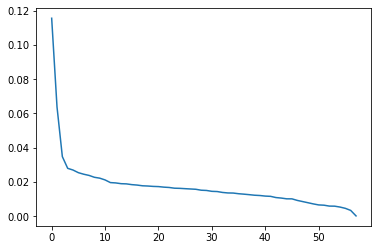

In [70]:
a = pca.explained_variance_ratio_
pop=range(len(a))
plt.plot(pop,a)

Получается что 1 и 2 признак наиболее весомые в нашей выборке, по ним и попробуем построить графики, предпологая что будет возможность как то визуально их разделить.


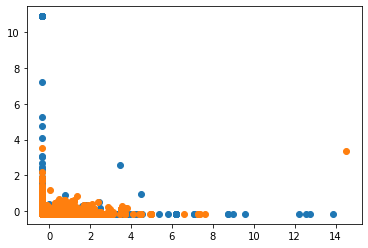

In [71]:
spam = x[round(x[57]) == 1]
norm = x[round(x[57]) == -1]
spam = spam[spam.columns[0:2]]
norm = norm[norm.columns[0:2]]
plt.scatter(norm[0], norm[1])
plt.scatter(spam[0], spam[1])

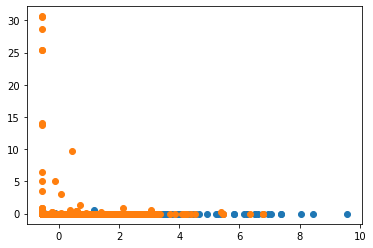

In [72]:
spam = x[round(x[57]) == 1]
norm = x[round(x[57]) == -1]
spam = spam[spam.columns[2:4]]
norm = norm[norm.columns[2:4]]
plt.scatter(norm[2], norm[3])
plt.scatter(spam[2], spam[3])

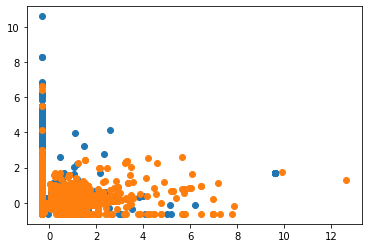

In [73]:
spam = x[round(x[57]) == 1]
norm = x[round(x[57]) == -1]
spam = spam[spam.columns[10:12]]
norm = norm[norm.columns[10:12]]
plt.scatter(norm[10], norm[11])
plt.scatter(spam[10], spam[11])

Вот тут и обнаруживается что попытки визуализировать 57-ми мерное пространство по главным компонентам достаточно проблематично...


In [74]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None, names=cols, index_col=57)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df,df.index.values , test_size=0.3) # Разбиваем данные
scaler = StandardScaler().fit(X_train)                           
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)                                               # Нормализуем

In [76]:
model = SVC(kernel='linear')
_ = model.fit(X_train, y_train)
print('SVM Accuracy linear kernel:' , model.score(X_test, y_test))

SVM Accuracy linear kernel: 0.9362780593772628


In [77]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, y_train)
print('SVM Accuracy RBF kernel:' , model.score(X_test, y_test))

SVM Accuracy RBF kernel: 0.9384503982621288


In [78]:
model = SVC(kernel='sigmoid')
_ = model.fit(X_train, y_train)
print('SVM Accuracy sigmoid kernel:' , model.score(X_test, y_test))

SVM Accuracy sigmoid kernel: 0.8826937002172339


In [79]:
def kernel(X1, X2):
    return (X1@X2.T)**2
model = SVC(kernel=kernel)
_ = model.fit(X_train, y_train)
print('SVM Accuracy custom kernel:' , model.score(X_test, y_test))

SVM Accuracy custom kernel: 0.8950036205648081


Получается что RBF и линейное ядро лучше подходит для данной задачи классификации. Перейдем к методу 'k-ближайших соседей'.


Лучший результат на стандартных параметрах:  0.9181752353367125


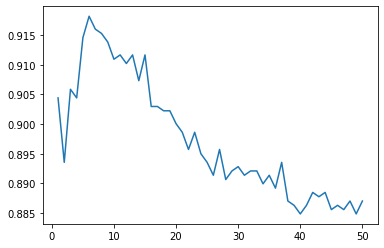

In [80]:
y=range(1,51)
x=[]
for i in y:
  model = KNeighborsClassifier(n_neighbors=i)
  _ = model.fit(X_train, y_train)
  x.append(model.score(X_test, y_test))

plt.plot(y,x)
print('Лучший результат на стандартных параметрах: ',max(x))

Лучший результат при метрике Cosine:  0.9210716871832005


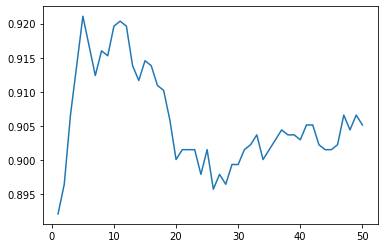

In [81]:
x=[]
for i in y:
  model = KNeighborsClassifier(n_neighbors=i, metric= 'cosine')
  _ = model.fit(X_train, y_train)
  x.append(model.score(X_test, y_test))

plt.plot(y,x)
print('Лучший результат при метрике Cosine: ',max(x))

Лучший результат при метрике Chebyshev:  0.8957277335264301


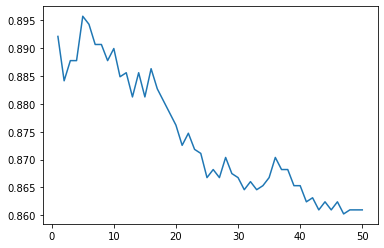

In [82]:
x=[]
for i in y:
  model = KNeighborsClassifier(n_neighbors=i, metric= 'chebyshev')
  _ = model.fit(X_train, y_train)
  x.append(model.score(X_test, y_test))

plt.plot(y,x)
print('Лучший результат при метрике Chebyshev: ',max(x))

Лучший результат при метрике manhattan:  0.9138305575669804


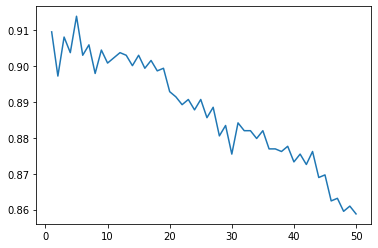

In [83]:
x=[]
for i in y:
  model = KNeighborsClassifier(n_neighbors=i, metric= 'manhattan')
  _ = model.fit(X_train, y_train)
  x.append(model.score(X_test, y_test))

plt.plot(y,x)
print('Лучший результат при метрике manhattan: ',max(x))

Лучший результат в евклидовом пространстве:  0.9181752353367125


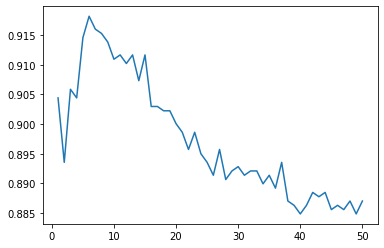

In [84]:
x=[]
for i in y:
  model = KNeighborsClassifier(n_neighbors=i, metric= 'euclidean')
  _ = model.fit(X_train, y_train)
  x.append(model.score(X_test, y_test))

plt.plot(y,x)
print('Лучший результат в евклидовом пространстве: ',max(x))

Метод k-ближайших соседей с линейно убивающими весами

In [85]:
def func(distance):
    ret = np.ones_like(distance)
    k = ret.shape[1]
    for i in range(k):
        ret[:, i] *= (k-i)/k
    return ret 

Лучший результат с убывающими весами:  0.9254163649529327


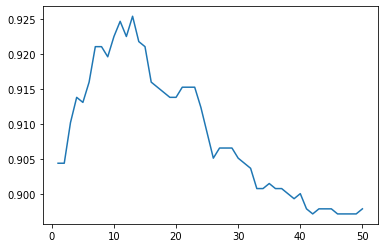

In [86]:
x=[]
for i in y:
  model = KNeighborsClassifier(n_neighbors=i, weights=func)
  _ = model.fit(X_train, y_train)
  x.append(model.score(X_test, y_test))

plt.plot(y,x)
print('Лучший результат с убывающими весами: ',max(x))

Лучший результат с убывающими весами с лучшей получившейся на прошлом этапе метрикой manhattan:  0.9181752353367125


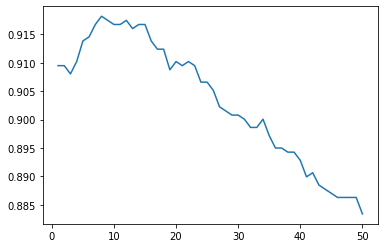

In [87]:
x=[]
for i in y:
  model = KNeighborsClassifier(n_neighbors=i, weights=func, metric= 'manhattan')
  _ = model.fit(X_train, y_train)
  x.append(model.score(X_test, y_test))

plt.plot(y,x)
print('Лучший результат с убывающими весами с лучшей получившейся на прошлом этапе метрикой manhattan: ',max(x))


Метод окна Парзена

In [88]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

Лучший результат:  0.8522809558291093


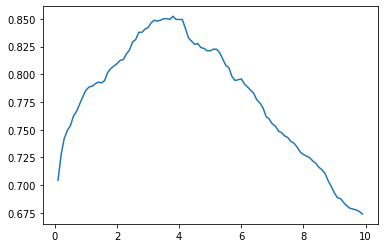

In [89]:
x=[]
for i, h in enumerate(np.arange(0.1,10,0.1)):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, y_train)
    x.append(model.score(X_test, y_test))
y=np.arange(0.1,10,0.1)  
print('Лучший результат: ',max(x))
plt.plot(y,x)  

Выводы: При переборе различных гиперпараметров вышло примерно одинаково хорошее качество, вероятно это можно объяснить тем, что оба подхода одинаково сложны в вычислении и хорошо подходят для данной задачи. Самое плохое качество, даже при стандартных параметрах, не опускалось ниже 85%, но вероятно это так же связанно с тем что данные были изначально хорошо подготовлены для данных подходов, подозреваю что с реальными данным “с улицы” качество бы не было столь высоким. 
Единственная проблемма встреченная мной это высокое пространство и непонятные названия признаков, что крайне усложняет процесс визуального анализа, конечно можно было бы попарно построить все 1653 проекции и выбрать более подходящие, но исходя из метода главных компонент, самыми весомыми признаками являются 1-4, а они визуально неразделимы, так что я решил не продолжать эксперименты с построениями.